# Average plot

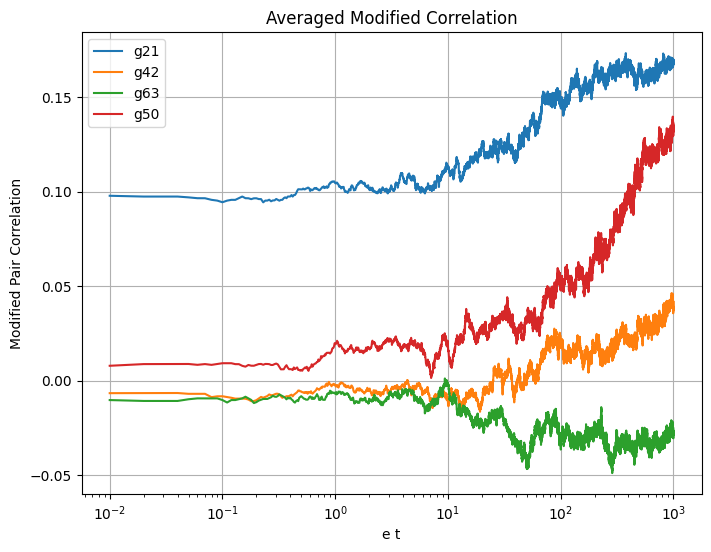

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# List all files matching the pattern "gij*.txt"
file_list = sorted(glob.glob("gij*.txt"))

# Check if files exist
if not file_list:
    raise FileNotFoundError("No 'gij*.txt' files found in the directory!")

# Read the first file (any one file) to get x values
reference_data = np.loadtxt(file_list[0], comments="#", dtype=float, skiprows=0)
num_rows, num_cols = reference_data.shape

# Use the first column directly from the first file as the x-values
x = reference_data[:, 0]

# Initialize an array to store cumulative sums (excluding first column)
data_sum = np.zeros((num_rows, num_cols - 1))

# Read and accumulate data from each file (excluding first column)
for file in file_list:
    try:
        data = np.loadtxt(file, comments="#", dtype=float, skiprows=0)
        data_sum += data[:, 1:]  # Sum only columns 2, 3, 4, ...
    except ValueError:
        print(f"Warning: Skipping non-numeric data in file {file}")

# Compute average (excluding first column)
data_avg = data_sum / len(file_list)

# Combine x with averaged data
final_data = np.column_stack((x, data_avg))

# Save the averaged data to a new file
np.savetxt("gij_avg.txt", final_data, fmt="%.6f")

# Extract averaged columns for plotting
g21 = data_avg[:, 0]  # Second column
g42 = data_avg[:, 1]  # Third column
g63 = data_avg[:, 2]  # Fourth column
g50 = data_avg[:, 3]  # Fifth column

# Create plot
plt.figure(figsize=(8, 6))
plt.title("Averaged Modified Correlation")
plt.xlabel("e t")
plt.ylabel("Modified Pair Correlation")
plt.grid(True)

# Set log scale for x-axis
plt.xscale("log")

# Plot averaged data
plt.plot(x, g21, label="g21", linestyle="-")
plt.plot(x, g42, label="g42", linestyle="-")
plt.plot(x, g63, label="g63", linestyle="-")
plt.plot(x, g50, label="g50", linestyle="-")

# Show legend
plt.legend()

# Save and show plot
plt.savefig("modified_correlation_avg.png", dpi=300)
plt.show()


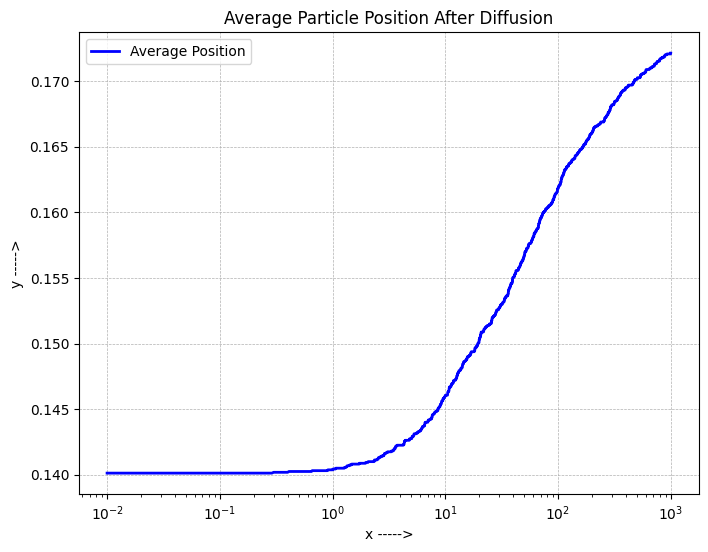

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# List all files matching the pattern "density*.txt"
file_list = sorted(glob.glob("density*.txt"))

# Initialize lists to store x and y coordinates
x_all, y_all = [], []

# Read data from each file and collect x, y positions
for file in file_list:
    try:
        data = np.loadtxt(file)
        x_all.extend(data[:, 0])  # First column (x-coordinates)
        y_all.extend(data[:, 1])  # Second column (y-coordinates)
    except ValueError:
        print(f"Warning: Skipping file {file} due to non-numeric data.")

# Check if there are any points to plot
if len(x_all) == 0 or len(y_all) == 0:
    raise ValueError("No valid data to plot.")

# Convert lists to numpy arrays
x_all = np.array(x_all)
y_all = np.array(y_all)

# Get unique x values and calculate the average y for each unique x
unique_x = np.unique(x_all)

# Initialize a list to store the average y values
y_avg = []

# Calculate the average y value for each unique x
for x in unique_x:
    y_avg.append(np.mean(y_all[x_all == x]))

# Convert y_avg to a numpy array
y_avg = np.array(y_avg)

# Create plot
plt.figure(figsize=(8, 6))
plt.title("Average Particle Position After Diffusion")
plt.xlabel("x ----->")
plt.ylabel("y ----->")

# Hide tick labels but keep grid lines
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xscale("log")
# Plot the average line
plt.plot(unique_x, y_avg, color="blue", label="Average Position", linewidth=2)

# Show legend and save the plot
plt.legend()
plt.savefig("2d_RSAD_avg_line_plot.png", dpi=300)
plt.show()
